In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
import ta
import time
import threading
from pytz import timezone

Script que utiliza subprocesos (threading.Thread) para actualizar periódicamente los datos financieros de varias empresas utilizando la biblioteca yfinance en Python. 


Este código define una clase llamada ActualizadorDatosEmpresa, que es una subclase de threading.Thread. Esta clase se utiliza para actualizar los datos de una empresa específica de forma periódica en un hilo separado. Aquí está una explicación de las principales partes del código:

__init__(self, symbol, intervalo_actualizacion=60): Este es el método inicializador de la clase. Toma dos parámetros: symbol, que representa el símbolo de la empresa cuyos datos se van a actualizar, y intervalo_actualizacion, que especifica el intervalo de tiempo en segundos entre cada actualización de datos. El método establece estos valores como atributos de la instancia de la clase.

obtener_datos_empresa(self): Este método utiliza la biblioteca yfinance (asumimos que está importada en otro lugar del código) para obtener los datos más recientes de la empresa representada por el símbolo dado. Retorna un DataFrame de Pandas con los datos históricos de la empresa para el último día.

imprimir_datos(self, datos): Este método imprime los datos más recientes de la empresa en la consola. datos.head() se utiliza para imprimir solo las primeras filas del DataFrame.

run(self): Este método es ejecutado cuando se inicia el hilo utilizando el método start(). Dentro de este método, se implementa un bucle while que continúa actualizando los datos de la empresa mientras el atributo continuar_actualizando sea True. En cada iteración del bucle, se intenta obtener los datos más recientes utilizando el método obtener_datos_empresa() y luego se imprimen utilizando el método imprimir_datos(). Después de cada actualización, el hilo se duerme durante el intervalo especificado antes de realizar la siguiente actualización.

detener_actualizacion(self): Este método se utiliza para detener la actualización de datos estableciendo el atributo continuar_actualizando en False.

En el bloque if __name__ == "__main__":, se crea una lista de símbolos de empresas y se itera sobre ella para crear una instancia de ActualizadorDatosEmpresa para cada empresa. Se inician todos los hilos para comenzar la actualización de datos. Luego, el programa espera 5 minutos antes de detener la actualización de datos para todas las empresas.

 Finalmente, se llama al método detener_actualizacion() para cada hilo y se espera a que todos los hilos terminen su ejecución utilizando el método join().

In [1]:
import yfinance as yf
import time
import threading

class ActualizadorDatosEmpresa(threading.Thread):
    def __init__(self, symbol, intervalo_actualizacion=60):
        super().__init__()
        self.symbol = symbol
        self.intervalo_actualizacion = intervalo_actualizacion
        self.continuar_actualizando = True  # Atributo para controlar la continuidad de la actualización

    def obtener_datos_empresa(self):
        empresa = yf.Ticker(self.symbol)
        info_empresa = empresa.info
        datos_recientes = empresa.history(period='1d')
        return datos_recientes

    def imprimir_datos(self, datos):
        print("Datos actualizados para", self.symbol)
        print(datos.head())  # Mostrar solo las primeras filas de los datos

    def run(self):
        while self.continuar_actualizando:  # Continuar actualizando mientras el atributo sea True
            try:
                datos_recientes = self.obtener_datos_empresa()
                self.imprimir_datos(datos_recientes)
                print("="*50)  # Separador visual entre datos
            except Exception as e:
                print("Error al actualizar los datos para", self.symbol, ":", e)
            finally:
                time.sleep(self.intervalo_actualizacion)

    def detener_actualizacion(self):
        self.continuar_actualizando = False  # Cambiar el atributo a False para detener la actualización

if __name__ == "__main__":
    # Símbolos de las primeras 10 empresas de EE. UU.
    empresas = ["AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "META", "BRK-A", "BRK-B", "JNJ", "V"]
    
    # Crear una instancia de ActualizadorDatosEmpresa para cada empresa y actualizar datos
    hilos_empresas = []
    for symbol in empresas:
        hilo = ActualizadorDatosEmpresa(symbol, intervalo_actualizacion=60)
        hilos_empresas.append(hilo)
        hilo.start()

    # Esperar un cierto período de tiempo antes de detener la actualización
    time.sleep(300)  # Esperar 5 minutos

    # Detener la actualización de datos
    for hilo in hilos_empresas:
        hilo.detener_actualizacion()  # Llamar al método para detener la actualización
        hilo.join()  # Esperar a que el hilo termine




Datos actualizados para GOOGL
Datos actualizados para AAPL
Datos actualizados para MSFT
                                 Open        High         Low       Close  \
Date                                                                        
2024-04-24 00:00:00-04:00  157.490005  159.570007  157.169998  159.130005   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-04-24 00:00:00-04:00  22684500        0.0           0.0  
                                 Open        High         Low       Close  \
Date                                                                        
2024-04-24 00:00:00-04:00  166.539993  169.300003  166.210007  169.020004   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-04-24 00:00:00-04:00  48121300        0.0           0.0  
                                 Open        High         Low       Cl

Este código creará una gráfica de barras que muestra los precios de cierre de las acciones para las empresas MSFT, AMZN y GOOG. Cada barra representa el precio de cierre de una empresa específica. 

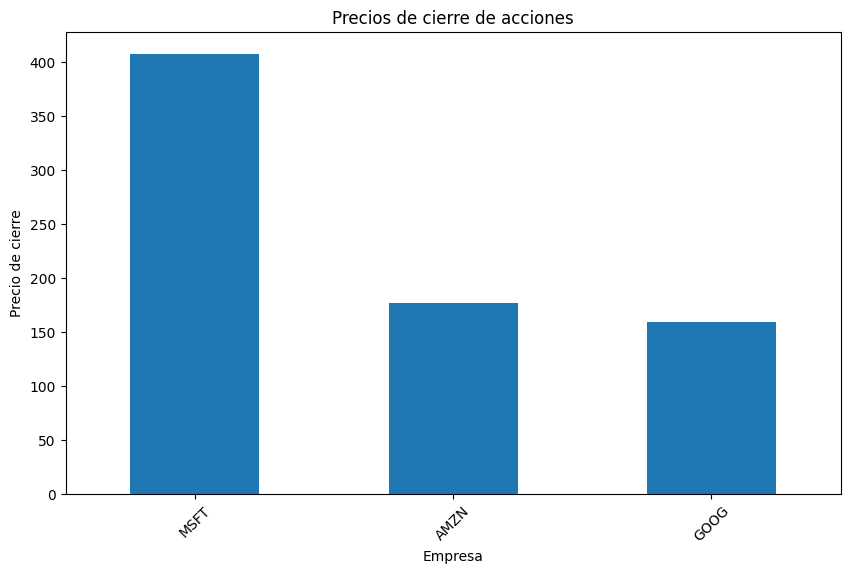

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos proporcionados
data = {
    'MSFT': {
        'Open': 409.559998,
        'High': 412.459991,
        'Low': 407.290009,
        'Close': 407.345215,
        'Volume': 5895145,
        'Dividends': 0.0,
        'Stock Splits': 0.0
    },
    'AMZN': {
        'Open': 179.949997,
        'High': 180.322998,
        'Low': 176.410004,
        'Close': 176.630096,
        'Volume': 13534686,
        'Dividends': 0.0,
        'Stock Splits': 0.0
    },
    'GOOG': {
        'Open': 159.085007,
        'High': 160.729996,
        'Low': 158.820007,
        'Close': 159.5,
        'Volume': 7290803,
        'Dividends': 0.0,
        'Stock Splits': 0.0
    }
}

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data).transpose()

# Graficar los precios de cierre
df['Close'].plot(kind='bar', figsize=(10, 6))
plt.title('Precios de cierre de acciones')
plt.xlabel('Empresa')
plt.ylabel('Precio de cierre')
plt.xticks(rotation=45)
plt.show()
